In [2]:
# Survival Analysis in R
# Copyright 2013 by Ani Katchova

# install.packages("survival")
library(survival)

mydata<- read.csv("survival_unemployment.csv")
attach(mydata)

In [3]:
# Define variables 
time <- spell
event <- event
X <- cbind(logwage, ui, age)
group <- ui

In [4]:
# Descriptive statistics
summary(time)
summary(event)
summary(X)
summary(group)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   5.000   6.248   9.000  28.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   0.321   1.000   1.000 

    logwage            ui              age       
 Min.   :2.708   Min.   :0.0000   Min.   :20.00  
 1st Qu.:5.298   1st Qu.:0.0000   1st Qu.:27.00  
 Median :5.677   Median :1.0000   Median :34.00  
 Mean   :5.693   Mean   :0.5528   Mean   :35.44  
 3rd Qu.:6.052   3rd Qu.:1.0000   3rd Qu.:43.00  
 Max.   :7.600   Max.   :1.0000   Max.   :61.00  

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0000  0.5528  1.0000  1.0000 

Call: survfit(formula = Surv(time, event) ~ 1)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1   3343     294    0.912 0.00490        0.903        0.922
    2   2803     178    0.854 0.00622        0.842        0.866
    3   2321     119    0.810 0.00708        0.797        0.824
    4   1897      56    0.786 0.00756        0.772        0.801
    5   1676     104    0.738 0.00847        0.721        0.754
    6   1339      32    0.720 0.00882        0.703        0.737
    7   1196      85    0.669 0.00979        0.650        0.688
    8    933      15    0.658 0.01001        0.639        0.678
    9    848      33    0.632 0.01057        0.612        0.654
   10    717       3    0.630 0.01064        0.609        0.651
   11    659      26    0.605 0.01128        0.583        0.627
   12    556       7    0.597 0.01150        0.575        0.620
   13    509      25    0.568 0.01234        0.544        0.593
   14    415      30    0.527 0.01353        0.501      

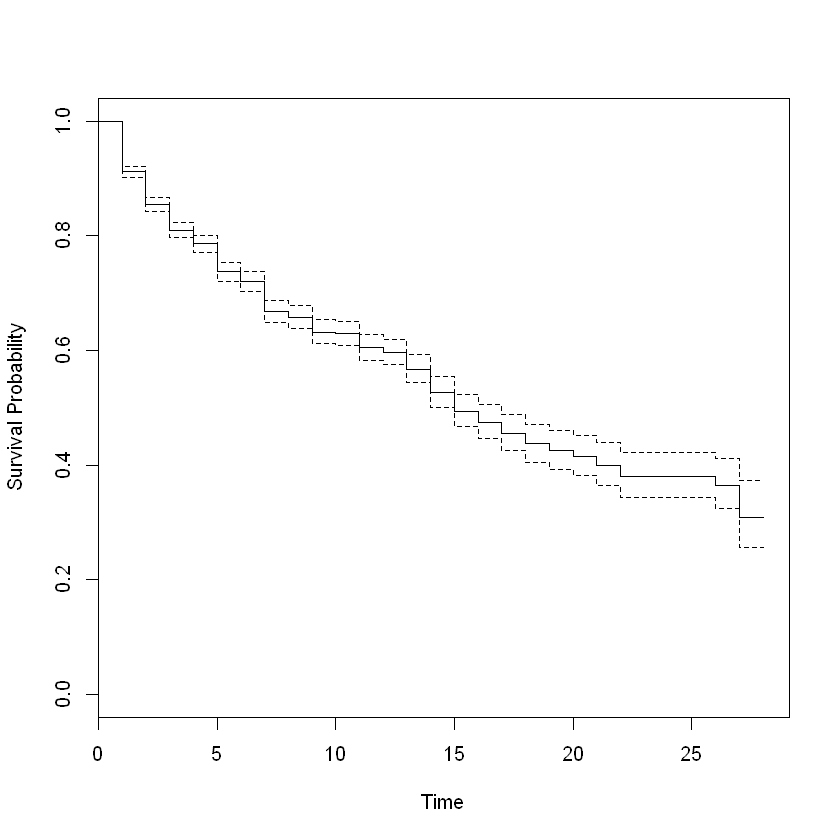

In [5]:

# Kaplan-Meier non-parametric analysis
kmsurvival <- survfit(Surv(time,event) ~ 1)
summary(kmsurvival)
plot(kmsurvival, xlab="Time", ylab="Survival Probability")

Call: survfit(formula = Surv(time, event) ~ group)

                group=0 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1   1495     266    0.822 0.00989        0.803        0.842
    2   1038     116    0.730 0.01191        0.707        0.754
    3    717      55    0.674 0.01317        0.649        0.701
    4    501      20    0.647 0.01396        0.620        0.675
    5    423      36    0.592 0.01550        0.563        0.623
    6    305       8    0.577 0.01603        0.546        0.609
    7    265      28    0.516 0.01801        0.482        0.552
    8    191       4    0.505 0.01842        0.470        0.542
    9    176       5    0.491 0.01898        0.455        0.529
   10    151       1    0.487 0.01913        0.451        0.526
   11    141       6    0.467 0.02010        0.429        0.508
   12    116       1    0.463 0.02033        0.424        0.504
   13    111       5    0.442 0.02144        0.402        0.486
   14     91       9    0.3

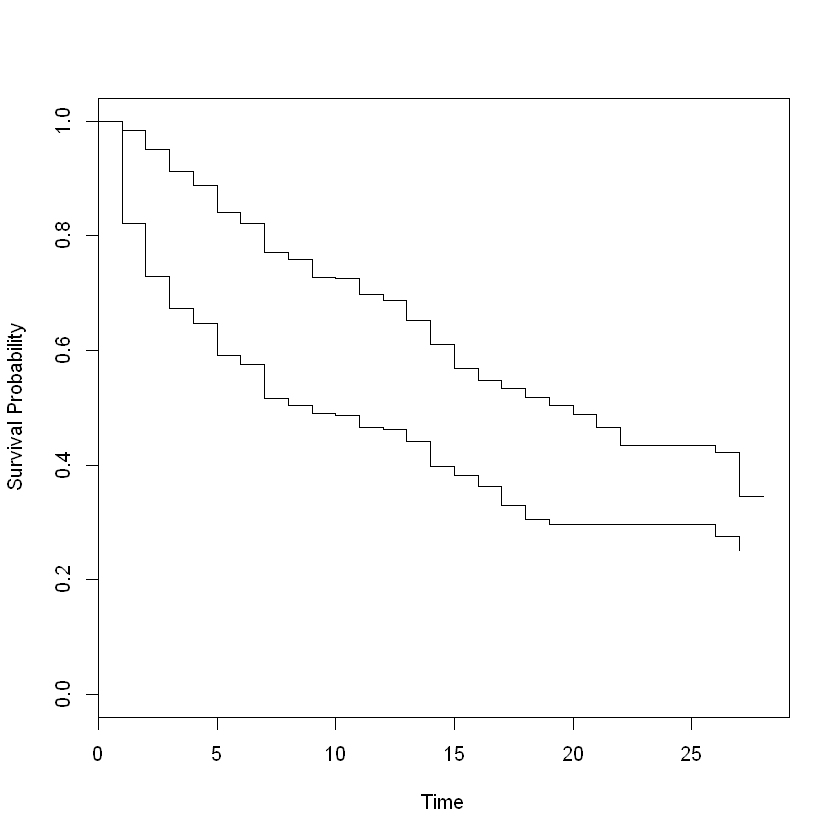

In [6]:
# Kaplan-Meier non-parametric analysis by group
kmsurvival1 <- survfit(Surv(time, event) ~ group)
summary(kmsurvival1)
plot(kmsurvival1, xlab="Time", ylab="Survival Probability")


Call: survfit(formula = coxph(Surv(time, event) ~ 1), type = "aalen")

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1   3343     294    0.916 0.00470        0.907        0.925
    2   2803     178    0.859 0.00601        0.848        0.871
    3   2321     119    0.817 0.00688        0.803        0.830
    4   1897      56    0.793 0.00738        0.778        0.807
    5   1676     104    0.745 0.00828        0.729        0.761
    6   1339      32    0.727 0.00865        0.711        0.745
    7   1196      85    0.678 0.00960        0.659        0.697
    8    933      15    0.667 0.00985        0.648        0.686
    9    848      33    0.641 0.01042        0.621        0.662
   10    717       3    0.639 0.01049        0.618        0.660
   11    659      26    0.614 0.01115        0.592        0.636
   12    556       7    0.606 0.01138        0.584        0.629
   13    509      25    0.577 0.01223        0.554        0.602
   14    415      30    0.537 0.0

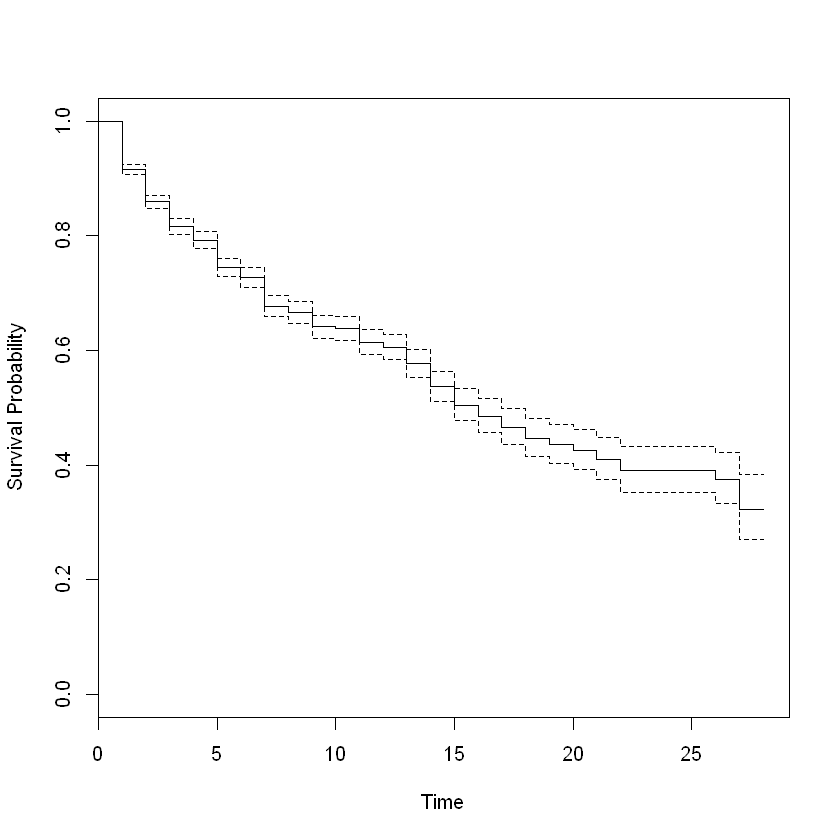

In [7]:
# Nelson-Aalen non-parametric analysis
nasurvival <- survfit(coxph(Surv(time,event)~1), type="aalen")
summary(nasurvival)
plot(nasurvival, xlab="Time", ylab="Survival Probability")


In [8]:
# Cox proportional hazard model - coefficients and hazard rates
coxph <- coxph(Surv(time,event) ~ X, method="breslow")
summary(coxph)


Call:
coxph(formula = Surv(time, event) ~ X, method = "breslow")

  n= 3343, number of events= 1073 

              coef exp(coef)  se(coef)       z Pr(>|z|)    
Xlogwage  0.461553  1.586535  0.057190   8.070    7e-16 ***
Xui      -0.979578  0.375470  0.063979 -15.311  < 2e-16 ***
Xage     -0.010850  0.989209  0.003132  -3.465 0.000531 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

         exp(coef) exp(-coef) lower .95 upper .95
Xlogwage    1.5865     0.6303    1.4183    1.7747
Xui         0.3755     2.6633    0.3312    0.4256
Xage        0.9892     1.0109    0.9832    0.9953

Concordance= 0.693  (se = 0.011 )
Rsquare= 0.081   (max possible= 0.992 )
Likelihood ratio test= 281.5  on 3 df,   p=<2e-16
Wald test            = 286.3  on 3 df,   p=<2e-16
Score (logrank) test = 300  on 3 df,   p=<2e-16


In [9]:

# Exponential, Weibull, and log-logistic parametric model coefficients
# Opposite signs from Stata results, Weibull results differ; same as SAS
exponential <- survreg(Surv(time,event) ~ X, dist="exponential")
summary(exponential)


Call:
survreg(formula = Surv(time, event) ~ X, dist = "exponential")
               Value Std. Error     z       p
(Intercept)  4.64259    0.30841 15.05 < 2e-16
Xlogwage    -0.48097    0.05678 -8.47 < 2e-16
Xui          1.07746    0.06269 17.19 < 2e-16
Xage         0.01264    0.00312  4.05 5.2e-05

Scale fixed at 1 

Exponential distribution
Loglik(model)= -4083.8   Loglik(intercept only)= -4258.4
	Chisq= 349.26 on 3 degrees of freedom, p= 2.2e-75 
Number of Newton-Raphson Iterations: 5 
n= 3343 


In [10]:
weibull <- survreg(Surv(time,event) ~ X, dist="weibull")
summary(weibull)




Call:
survreg(formula = Surv(time, event) ~ X, dist = "weibull")
               Value Std. Error     z       p
(Intercept)  4.47839    0.29145 15.37 < 2e-16
Xlogwage    -0.45668    0.05343 -8.55 < 2e-16
Xui          1.03521    0.06014 17.21 < 2e-16
Xage         0.01247    0.00292  4.28 1.9e-05
Log(scale)  -0.06955    0.02328 -2.99  0.0028

Scale= 0.933 

Weibull distribution
Loglik(model)= -4079.5   Loglik(intercept only)= -4258.2
	Chisq= 357.57 on 3 degrees of freedom, p= 3.4e-77 
Number of Newton-Raphson Iterations: 5 
n= 3343 


In [11]:














loglogistic <- survreg(Surv(time,event) ~ X, dist="loglogistic")
summary(loglogistic)



Call:
survreg(formula = Surv(time, event) ~ X, dist = "loglogistic")
               Value Std. Error      z       p
(Intercept)  4.04085    0.31258  12.93 < 2e-16
Xlogwage    -0.46218    0.05653  -8.18 2.9e-16
Xui          1.20988    0.05939  20.37 < 2e-16
Xage         0.01060    0.00291   3.64 0.00028
Log(scale)  -0.30631    0.02437 -12.57 < 2e-16

Scale= 0.736 

Log logistic distribution
Loglik(model)= -4014.1   Loglik(intercept only)= -4232
	Chisq= 435.7 on 3 degrees of freedom, p= 4.1e-94 
Number of Newton-Raphson Iterations: 4 
n= 3343 
